In [ ]:
https://github.com/stasi009/TakeHomeDataChallenges/blob/master/04.FraudActivity/fraud_activity.ipynb

In [1]:
### load library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# missing data vis 
import missingno


## Plotint setting 
%matplotlib inline
sns.set(style="white",palette= "muted")
sns.set_context("talk", font_scale=0.9)#, rc={"lines.linewidth": 1})


### for ttest 

from scipy.stats import ttest_ind

C:\Users\jpouu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jpouu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
fraud = pd.read_csv("./Fraud_Data.csv")
mapping = pd.read_csv("./IpAddress_to_Country.csv")
mapping['upper_bound_ip_address'] = mapping['upper_bound_ip_address'].astype("float64")
mapping = mapping.sort_values('lower_bound_ip_address')

In [3]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


## problem 1 find country name for ip 

In [19]:
country = []
for i in range(len(fraud)):
    temp = fraud.loc[i,'ip_address']
    re = mapping.loc[(mapping['lower_bound_ip_address'] <= temp ) & (mapping['upper_bound_ip_address'] >= temp ),"country"]
    if len(re) == 1:
        country.append(re.values[0])
    else:
        country.append("NA")
        
fraud['country'] = country


In [21]:
fraud['country'].value_counts()

United States     58049
NA                21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Dominica              1
Cape Verde            1
Guadeloupe            1
Vanuatu               1
Burundi               1
Name: country, Length: 182, dtype: int64

In [22]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'] )
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'] )
fraud['hour_diff']  =  (fraud['purchase_time'] - fraud['signup_time'])/ np.timedelta64(1,'h')


In [24]:
fraud['device_id'].value_counts()

ITUMJCKWEYNDD    20
EQYVNEGOFLAWK    20
KIPFSCNUGOLDP    20
ZUSVMDEZRBDTX    20
CQTUVBYIWWWBC    20
                 ..
XLHOPEZTRBBIL     1
UXWACHWTBXOXE     1
OOTQAIVKAZSMT     1
XQBRPQXOOGQWU     1
FCPDFOPXKLRRZ     1
Name: device_id, Length: 137956, dtype: int64

In [ ]:
fraud['device_id'].value_counts()

In [25]:

for column in fraud.columns:
    top_freq = list(fraud[column].value_counts().index)
    print('{0:20s} {1:5d}\t'.format(column, len(top_freq)), top_freq[:5])

user_id              151112	 [264191, 209996, 396395, 394346, 138345]
signup_time          151112	 [Timestamp('2015-06-30 03:58:38'), Timestamp('2015-04-12 17:12:25'), Timestamp('2015-04-27 06:41:03'), Timestamp('2015-04-17 01:07:12'), Timestamp('2015-01-22 12:41:59')]
purchase_time        150679	 [Timestamp('2015-07-17 23:22:55'), Timestamp('2015-06-08 09:42:04'), Timestamp('2015-09-10 09:04:53'), Timestamp('2015-04-12 13:38:27'), Timestamp('2015-09-05 11:48:14')]
purchase_value         122	 [28, 27, 32, 24, 26]
device_id            137956	 ['ITUMJCKWEYNDD', 'EQYVNEGOFLAWK', 'KIPFSCNUGOLDP', 'ZUSVMDEZRBDTX', 'CQTUVBYIWWWBC']
source                   3	 ['SEO', 'Ads', 'Direct']
browser                  5	 ['Chrome', 'IE', 'Safari', 'FireFox', 'Opera']
sex                      2	 ['M', 'F']
age                     58	 [32, 31, 33, 30, 29]
ip_address           143512	 [3874757617.26129, 576060872.5273781, 2050963888.16442, 1502818419.73176, 2937899119.50045]
class                    2	 [

In [35]:

# how many times a device is shared
n_dev_shared = fraud.device_id.value_counts()

# because we are studying user's first transaction
# the more a device is shared, the more suspicious
fraud['n_dev_shared'] = fraud.device_id.map(n_dev_shared)
del fraud['device_id']

In [39]:
# how many times a ip address is shared
n_ip_shared = fraud.ip_address.value_counts()

# because we are studying user's first transaction
# the more a ip is shared, the more suspicous
fraud['n_ip_shared'] = fraud.ip_address.map(n_ip_shared)
del fraud['ip_address']

In [41]:
# how many users are from the same country
n_country_shared = fraud.country.value_counts()

# the less visit from a country, the more suspicious
fraud['n_country_shared'] = fraud.country.map(n_country_shared)
del fraud['country']

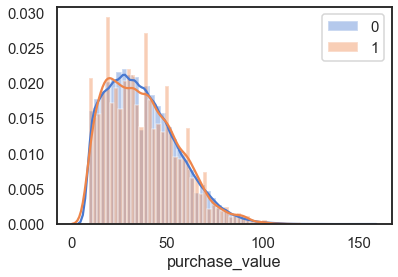

In [43]:
sns.distplot(fraud.loc[fraud['class']==0,'purchase_value'],label = "0")
sns.distplot(fraud.loc[fraud['class']==1,'purchase_value'],label = "1")
plt.legend()

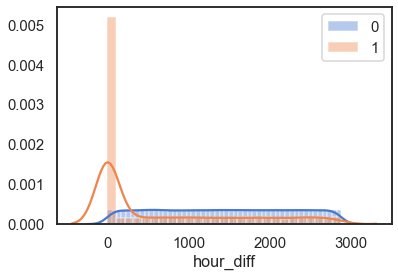

In [45]:
####### looks like more than 50% of fraud case happen for sign up time and first purchase time 


sns.distplot(fraud.loc[fraud['class']==0,'hour_diff'],label = "0")
sns.distplot(fraud.loc[fraud['class']==1,'hour_diff'],label = "1")
plt.legend()

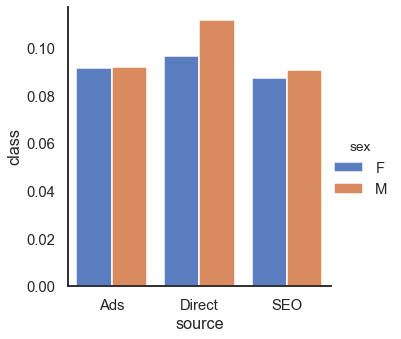

In [46]:
df_temp = fraud.groupby(['source',"sex"]).mean().reset_index()
sns.catplot(x="source" , y = "class",hue = "sex",kind = "bar", data = df_temp)

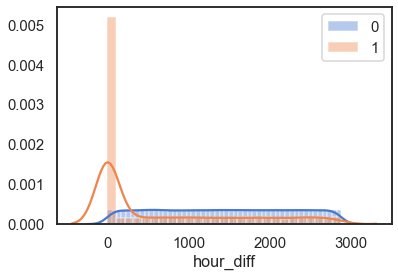

In [54]:
sns.distplot(fraud.loc[fraud['class']==0,'hour_diff'],label = "0")
sns.distplot(fraud.loc[fraud['class']==1,'hour_diff'],label = "1")
plt.legend()

### Feature Engineering 

In [60]:
cate = pd.get_dummies(fraud.loc[:,['source','browser','sex']])
X = pd.concat([cate,fraud.loc[:,['purchase_value','age','hour_diff','n_dev_shared','n_ip_shared','n_country_shared']]],axis= 1)
y =  fraud['class'] 

In [81]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_curve
from xgboost import XGBClassifier
import xgboost as xgb

In [82]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=888)
train_matrix = xgb.DMatrix(Xtrain,ytrain)
test_matrix = xgb.DMatrix(Xtest)

In [66]:
#xgb = XGBClassifier()
xgb.DMatrix()

In [95]:

params = {}
params['silent'] = 1
params['objective'] = 'binary:logistic'  # output probabilities
params['eval_metric'] = 'auc'
params["num_rounds"] = 300
params["early_stopping_rounds"] = 30
# params['min_child_weight'] = 2
params['max_depth'] = 6
params['eta'] = 0.1
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8

#xgb.fit()

In [78]:
params['eval_metric']

'auc'

In [85]:
from xgboost import cv

In [101]:
cv_results = xgb.cv( params,dtrain = train_matrix,num_boost_round= 500,
                    nfold = params.get('nfold',5),
                    metrics = params['eval_metric'],
                    early_stopping_rounds = params["early_stopping_rounds"],
                    verbose_eval = True, seed = 888)

[0]	train-auc:0.84143+0.00072	test-auc:0.84113+0.00272
[1]	train-auc:0.84270+0.00070	test-auc:0.84223+0.00244
[2]	train-auc:0.84323+0.00064	test-auc:0.84243+0.00234
[3]	train-auc:0.84333+0.00064	test-auc:0.84245+0.00228
[4]	train-auc:0.84345+0.00050	test-auc:0.84253+0.00247
[5]	train-auc:0.84353+0.00065	test-auc:0.84253+0.00238
[6]	train-auc:0.84377+0.00058	test-auc:0.84265+0.00226
[7]	train-auc:0.84431+0.00111	test-auc:0.84303+0.00267
[8]	train-auc:0.84620+0.00183	test-auc:0.84259+0.00376
[9]	train-auc:0.84719+0.00142	test-auc:0.84224+0.00304
[10]	train-auc:0.84808+0.00244	test-auc:0.84189+0.00285
[11]	train-auc:0.84986+0.00389	test-auc:0.84225+0.00309
[12]	train-auc:0.85001+0.00380	test-auc:0.84238+0.00335
[13]	train-auc:0.85229+0.00237	test-auc:0.84184+0.00305
[14]	train-auc:0.85385+0.00220	test-auc:0.84178+0.00331
[15]	train-auc:0.85537+0.00303	test-auc:0.84282+0.00321
[16]	train-auc:0.85699+0.00378	test-auc:0.84298+0.00288
[17]	train-auc:0.85840+0.00372	test-auc:0.84258+0.00326
[1

In [103]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.841430,0.000721,0.841130,0.002723
1,0.842697,0.000703,0.842228,0.002444
2,0.843226,0.000638,0.842429,0.002342
3,0.843328,0.000640,0.842451,0.002280
4,0.843446,0.000502,0.842530,0.002467
5,0.843533,0.000651,0.842531,0.002376
6,0.843769,0.000584,0.842653,0.002262
7,0.844308,0.001114,0.843029,0.002668
8,0.846195,0.001831,0.842593,0.003758
9,0.847190,0.001422,0.842239,0.003042


In [ ]:
xgb.train()

In [105]:

n_best_trees = cv_results.shape[0]

# retrain on the whole training dataset
watchlist = [(train_matrix, 'train')]
gbt = xgb.train(params, train_matrix, n_best_trees,watchlist)

[0]	train-auc:0.84150
[1]	train-auc:0.84288
[2]	train-auc:0.84314
[3]	train-auc:0.84308
[4]	train-auc:0.84315
[5]	train-auc:0.84339
[6]	train-auc:0.84361
[7]	train-auc:0.84372
[8]	train-auc:0.85092
[9]	train-auc:0.85195
[10]	train-auc:0.85183
[11]	train-auc:0.85550
[12]	train-auc:0.85689
[13]	train-auc:0.85760
[14]	train-auc:0.85938
[15]	train-auc:0.86003
[16]	train-auc:0.86261
[17]	train-auc:0.86366
[18]	train-auc:0.86562
[19]	train-auc:0.86525
[20]	train-auc:0.86572
[21]	train-auc:0.86808
[22]	train-auc:0.86978
[23]	train-auc:0.87118
[24]	train-auc:0.87169
[25]	train-auc:0.87244
[26]	train-auc:0.87340
[27]	train-auc:0.87450


In [106]:
 #### plot ROC 
def plot_validation_roc():
    """
    we cannot plot ROC on either training set or test set, since both are biased
    so I split the training dataset again into training set and validation set
    retrain on training set and plot ROC on validation set and choose a proper cutoff value
    
    define a class to limit the naming group, avoid polluting the global naming space
    """
    Xtrain_only,Xvalid,ytrain_only,yvalid = train_test_split(Xtrain,ytrain,test_size=0.3,random_state=888)
    onlytrain_matrix = xgb.DMatrix(Xtrain_only,ytrain_only)
    valid_matrix = xgb.DMatrix(Xvalid,yvalid)

    temp_gbt = xgb.train(params, onlytrain_matrix, n_best_trees,[(onlytrain_matrix,'train_only'),(valid_matrix,'validate')])
    yvalid_proba_pred = temp_gbt.predict(valid_matrix,ntree_limit=n_best_trees)

    fpr,tpr,thresholds = roc_curve(yvalid,yvalid_proba_pred)
    return pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})

In [107]:
roc = plot_validation_roc()

[0]	train_only-auc:0.84106	validate-auc:0.84209
[1]	train_only-auc:0.84255	validate-auc:0.84339
[2]	train_only-auc:0.84255	validate-auc:0.84339
[3]	train_only-auc:0.84257	validate-auc:0.84327
[4]	train_only-auc:0.84349	validate-auc:0.84197
[5]	train_only-auc:0.84387	validate-auc:0.84228
[6]	train_only-auc:0.84409	validate-auc:0.84242
[7]	train_only-auc:0.84417	validate-auc:0.84252
[8]	train_only-auc:0.84445	validate-auc:0.84264
[9]	train_only-auc:0.84469	validate-auc:0.84293
[10]	train_only-auc:0.84988	validate-auc:0.84265
[11]	train_only-auc:0.85230	validate-auc:0.84086
[12]	train_only-auc:0.85237	validate-auc:0.84088
[13]	train_only-auc:0.85238	validate-auc:0.84090
[14]	train_only-auc:0.85323	validate-auc:0.84096
[15]	train_only-auc:0.85426	validate-auc:0.84184
[16]	train_only-auc:0.85671	validate-auc:0.84173
[17]	train_only-auc:0.85952	validate-auc:0.84143
[18]	train_only-auc:0.86110	validate-auc:0.84149
[19]	train_only-auc:0.86497	validate-auc:0.84022
[20]	train_only-auc:0.86657	va

Text(0, 0.5, 'TPR')

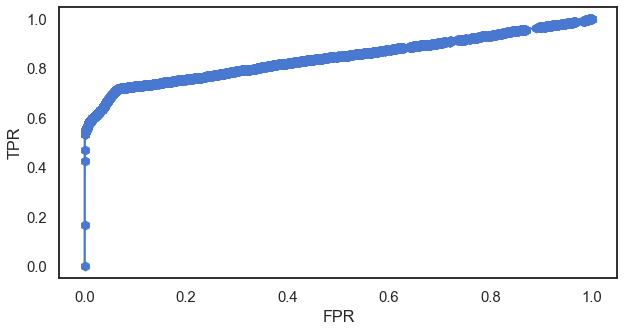

In [108]:
plt.figure(figsize=(10,5))
plt.plot(roc.FPR,roc.TPR,marker='h')
plt.xlabel("FPR")
plt.ylabel("TPR")

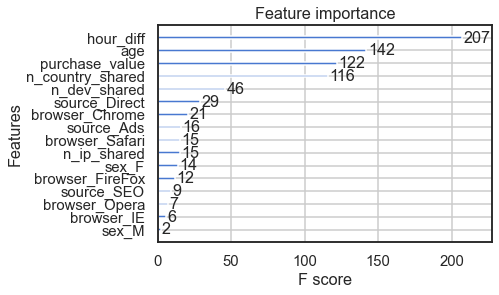

In [114]:
xgb.plot_importance(gbt)

In [115]:

dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=20,min_samples_split=20)
dt.fit(X,y)
export_graphviz(dt,feature_names=X.columns,class_names=['NotFraud','Fraud'],
                proportion=True,leaves_parallel=True,filled=True)

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\ngraph [ranksep=equally, splines=polyline] ;\n0 [label="hour_diff <= 0.019\\ngini = 0.17\\nsamples = 100.0%\\nvalue = [0.906, 0.094]\\nclass = NotFraud", fillcolor="#e88e4d"] ;\n1 [label="gini = 0.0\\nsamples = 5.0%\\nvalue = [0.0, 1.0]\\nclass = Fraud", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="n_dev_shared <= 1.5\\ngini = 0.087\\nsamples = 95.0%\\nvalue = [0.954, 0.046]\\nclass = NotFraud", fillcolor="#e68742"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="hour_diff <= 2436.371\\ngini = 0.059\\nsamples = 87.2%\\nvalue = [0.97, 0.03]\\nclass = NotFraud", fillcolor="#e6853f"] ;\n2 -> 3 ;\n4 [label="gini = 0.058\\nsamples = 73.7%\\nvalue = [0.97, 0.03]\\nclass = NotFraud", fillcolor="#e6853f"] ;\n3 -> 4 ;\n5 [label="gini = 0.065\\nsamples = 13.5%\\nvalue = [0.966, 0.034]\\nclass = NotFraud", fillcolor="#e68540"] ;\n3 -> 5 ;\n6 [label="